In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
dataset = pd.read_csv("Final.csv")
dataset.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [4]:
datasetNew = dataset.drop(['Patient_ID', 'Name_calc', 'a1c_Res', 'Lipids_Res','Total_RF', 'BP_res'], axis=1)
datasetNew = datasetNew.drop(['A1C_RF', 'BP_RF', 'Lip_RF', 'Alb_RF'], axis=1)
datasetNew['PerformedDate'] = pd.to_datetime(datasetNew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datasetNew.set_index(['PerformedDate'])
print(indexedDataset)

               Albumin/Creatinine_Res
PerformedDate                        
2017-11-02                      392.0
2017-10-16                      221.0
2014-04-07                        9.0
2014-03-07                        8.0
2014-02-05                        9.0
...                               ...
2015-08-17                        NaN
2016-09-21                        NaN
2015-07-17                        NaN
2018-01-22                        NaN
2017-08-30                        NaN

[5780611 rows x 1 columns]


In [5]:
from datetime import datetime

In [6]:
print(indexedDataset)

               Albumin/Creatinine_Res
PerformedDate                        
2017-11-02                      392.0
2017-10-16                      221.0
2014-04-07                        9.0
2014-03-07                        8.0
2014-02-05                        9.0
...                               ...
2015-08-17                        NaN
2016-09-21                        NaN
2015-07-17                        NaN
2018-01-22                        NaN
2017-08-30                        NaN

[5780611 rows x 1 columns]


In [7]:
indexedDataset = indexedDataset.dropna()

In [8]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               Albumin/Creatinine_Res
PerformedDate                        
1999-01-28                        8.0
1999-04-16                     5000.0
1999-04-20                        3.0
1999-05-04                     4000.0
1999-05-19                    24000.0
...                               ...
NaT                              14.0
NaT                              84.0
NaT                             257.0
NaT                             734.0
NaT                              75.0

[518848 rows x 1 columns]


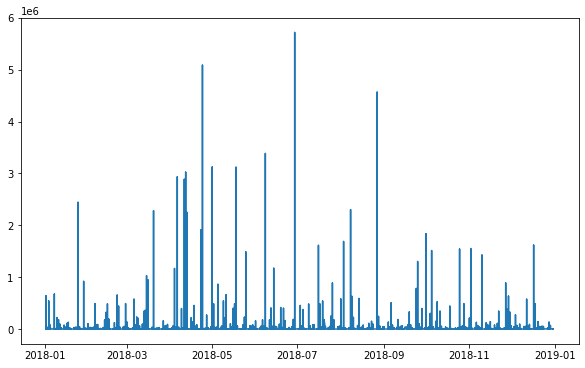

In [9]:
sub = indexedDataset['2018']
plt.plot(sub)

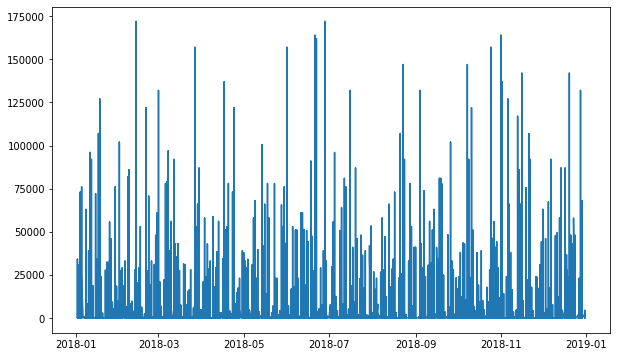

In [10]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['Albumin/Creatinine_Res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [11]:
new2.head(30)

,Albumin/Creatinine_Res
PerformedDate,
2018-01-02,94.0
2018-01-02,1.0
2018-01-02,43.0
2018-01-02,1.0
2018-01-02,708.0
2018-01-02,78.0
2018-01-02,979.0
2018-01-02,156.0
2018-01-02,825.0


In [12]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

               Albumin/Creatinine_Res
PerformedDate                        
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
...                               ...
2018-12-31                 106.583333
2018-12-31                 102.750000
2018-12-31                 100.250000
2018-12-31                 102.583333
2018-12-31                  95.666667

[66652 rows x 1 columns]                Albumin/Creatinine_Res
PerformedDate                        
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
...                               ...
2018-12-31                 156.828487
2018-12-31                 158.411504
2018-12-31                 159.774344
2018-12-31                 158.616437
2018-12-31              

In [156]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(new['Albumin/Creatinine_Res'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:


KeyboardInterrupt: 

In [13]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

               Albumin/Creatinine_Res
PerformedDate                        
2018-01-02                   4.543295
2018-01-02                   0.000000
2018-01-02                   3.761200
2018-01-02                   0.000000
2018-01-02                   6.562444
...                               ...
2018-12-31                   2.639057
2018-12-31                   3.091042
2018-12-31                   1.945910
2018-12-31                   3.761200
2018-12-31                   3.496508

[66652 rows x 1 columns]


In [14]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

               Albumin/Creatinine_Res
PerformedDate                        
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
...                               ...
2018-12-31                   3.617886
2018-12-31                   3.523847
2018-12-31                   3.385097
2018-12-31                   3.472859
2018-12-31                   3.368102

[66652 rows x 1 columns]                Albumin/Creatinine_Res
PerformedDate                        
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
2018-01-02                        NaN
...                               ...
2018-12-31                   1.689356
2018-12-31                   1.684222
2018-12-31                   1.743923
2018-12-31                   1.733220
2018-12-31              

In [15]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Albumin/Creatinine_Res
PerformedDate,
2018-01-02,0.656838
2018-01-02,-2.268495
2018-01-02,-1.376959
2018-01-02,1.527458
2018-01-02,-0.777379
2018-01-02,-0.735686
2018-01-02,2.319510
2018-01-02,-0.191180
2018-01-02,-1.112423


In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Albumin/Creatinine_Res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

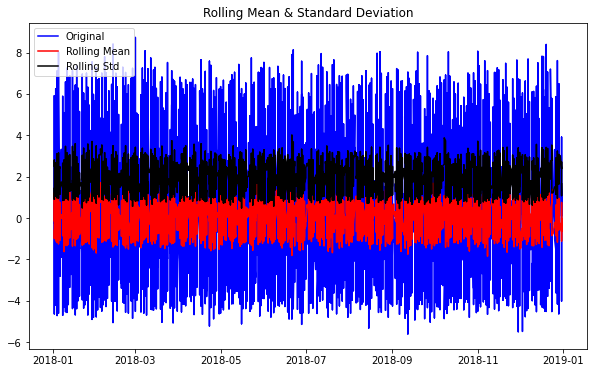

Results of Dickey-Fuller Test:
Test Statistic                   -52.657667
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    66579.000000
Critical Value (1%)               -3.430448
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [18]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

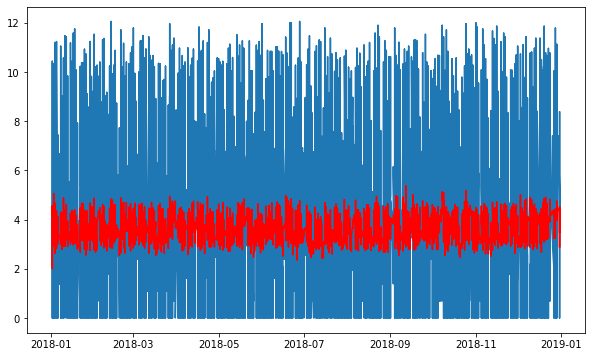

In [20]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

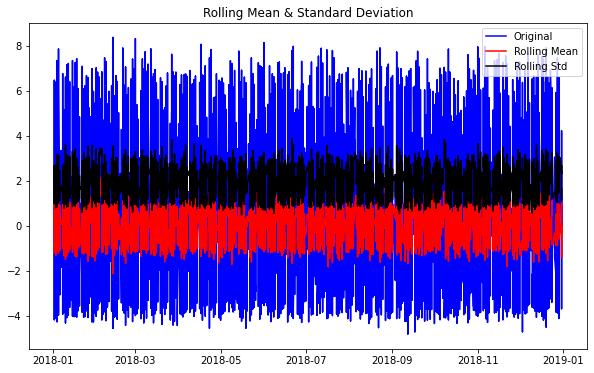

Results of Dickey-Fuller Test:
Test Statistic                   -46.304908
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    66590.000000
Critical Value (1%)               -3.430448
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [21]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

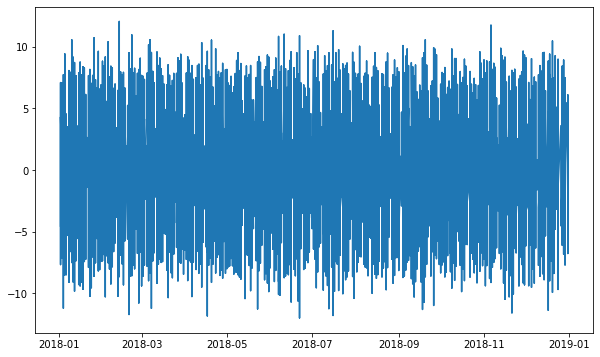

In [22]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

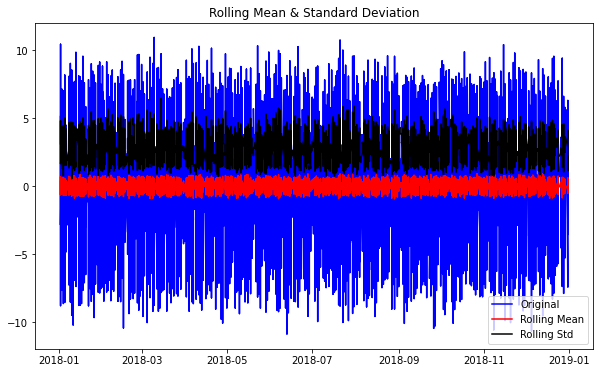

Results of Dickey-Fuller Test:
Test Statistic                   -54.607444
p-value                            0.000000
#Lags Used                        61.000000
Number of Observations Used    66478.000000
Critical Value (1%)               -3.430448
Critical Value (5%)               -2.861583
Critical Value (10%)              -2.566793
dtype: float64


In [202]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [206]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

In [221]:
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
#indexedDataset_logScale.reset_index(inplace=True)
indexedDataset_logScale['PerformedDate'] = pd.to_datetime(indexedDataset_logScale['PerformedDate'])
df = indexedDataset_logScale.set_index('PerformedDate')

In [223]:
sm.tsa.seasonal_decompose(df, model = 'additive', period = int(len(indexedDataset_logScale)/2))
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

TypeError: Index(...) must be called with a collection of some kind, 'seasonal' was passed

In [68]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

NameError: name 'residual' is not defined

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


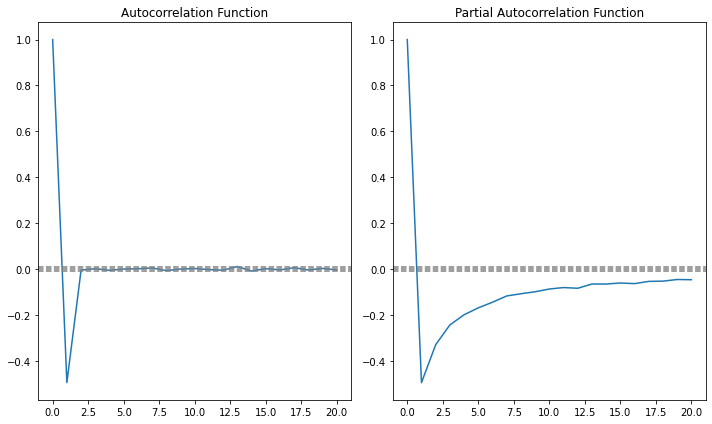

In [224]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [248]:
a = np.asarray(indexedDataset_logScale)
print(a)

['2018-01-02' '2018-01-02' '2018-01-02' ... '2018-12-31' '2018-12-31'
 '2018-12-31']


c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

Plotting AR model


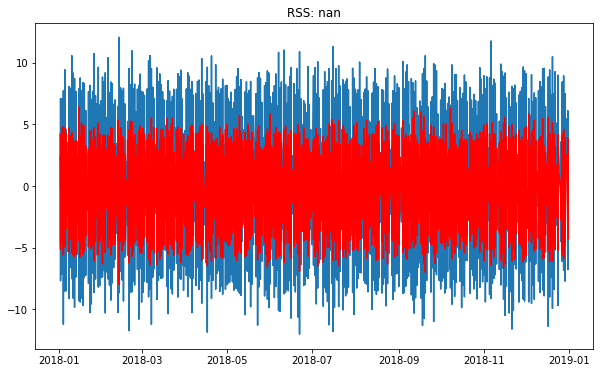

In [23]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Albumin/Creatinine_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


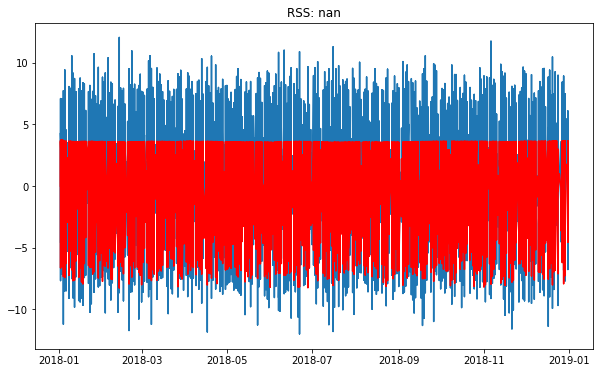

In [25]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Albumin/Creatinine_Res'])**2))
print('Plotting AR model')

In [45]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Albumin/Creatinine_Res'])**2))

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date i

MemoryError: Unable to allocate 33.0 GiB for an array with shape (66590, 66590) and data type float64

In [34]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-01-02    0.000001
2018-01-02    2.232400
2018-01-02   -0.959587
2018-01-02    2.042005
2018-01-02   -3.509756
dtype: float64


In [35]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-01-02    0.000001
2018-01-02    2.232401
2018-01-02    1.272814
2018-01-02    3.314819
2018-01-02   -0.194937
dtype: float64


In [36]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-01-02    4.543296
2018-01-02    6.775696
2018-01-02    5.816109
2018-01-02    7.858113
2018-01-02    4.348358
dtype: float64

MemoryError: Unable to allocate 31.1 GiB for an array with shape (4169054448,) and data type int64

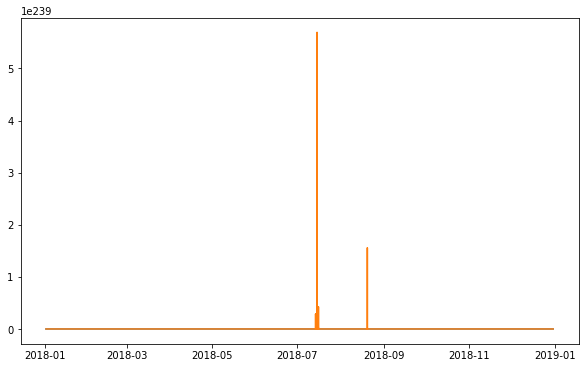

In [46]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['Albumin/Creatinine_Res'])**2)/len(indexedDataset['Albumin/Creatinine_Res'])))